# TSAI Assignment 7 - Code 1

### Model1
This code uses the model - model_1 on MNIST data

##### Target
A decent receptivity field.
(Start with a basic model. Keep on convoluting, (with o/p channels doubling in enry layer) until a decent receptivity field(21/28) of input image is received.)

##### Result
Model parameters - 6,303,746
Accuracy - 11.24 :( :(

##### Analysis
Accuracy is too low. Receptivity field of 21 is not sufficient for image classification in case of MNIST

In [1]:
from utils import torch,nn,F,optim,datasets,transforms
import utils

Create Train and test Transforms - use utils module

In [2]:
# Data transformation parameters
mean = 0.1307
std_dev = 0.3081

#Get train data transformation
train_transforms = utils.getTrainTransforms(mean,std_dev)

#Get Test data transformations
test_transforms = utils.getTestTransforms(mean,std_dev)

Get the MNIST data - train dataset and test dataset

In [3]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Get the train_loader and test_loader -  batches of data used in model training/testing

In [4]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

Plot some train data to make sure the loading is correct

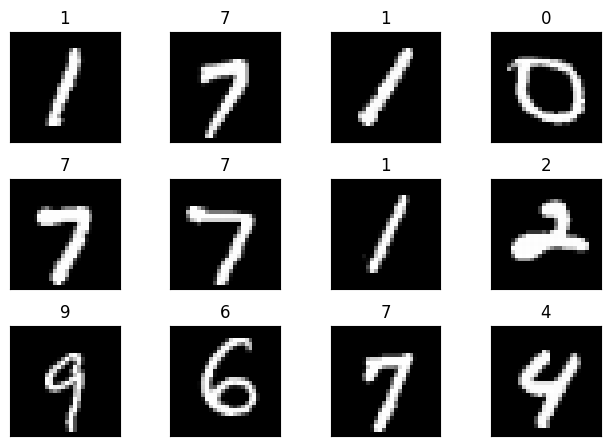

In [5]:
utils.plotData(train_loader, 12, 'gray')

## MODEL - 1

In [6]:
from models import model_1
myFirstModel = model_1.getModel()

Train and test your model for mutiple epochs

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

optimizer = optim.SGD(myFirstModel.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  tr_Acc, tr_loss = utils.train(myFirstModel, train_loader, optimizer, criterion)
  tst_acc, tst_loss = utils.test(myFirstModel, test_loader, criterion)
  train_acc.append(tr_Acc)
  train_losses.append(tr_loss)
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 1


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]D:\SRT_Courses\MachineLearning\TSAI\Session7\S7\models\model_1.py:51: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Train: Loss=2.3033 Batch_id=117 Accuracy=9.87: 100%|█████████████████████████████████| 118/118 [01:17<00:00,  1.53it/s]


Test set: Average loss: 2.3028, Accuracy: 980/10000 (9.80%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 2


Train: Loss=2.3037 Batch_id=117 Accuracy=9.87: 100%|█████████████████████████████████| 118/118 [01:04<00:00,  1.83it/s]


Test set: Average loss: 2.3022, Accuracy: 980/10000 (9.80%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 3


Train: Loss=2.3013 Batch_id=117 Accuracy=11.13: 100%|████████████████████████████████| 118/118 [01:03<00:00,  1.85it/s]


Test set: Average loss: 2.3019, Accuracy: 1135/10000 (11.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 4


Train: Loss=2.2992 Batch_id=117 Accuracy=11.24: 100%|████████████████████████████████| 118/118 [01:02<00:00,  1.89it/s]


Test set: Average loss: 2.3016, Accuracy: 1135/10000 (11.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 5


Train: Loss=2.3006 Batch_id=117 Accuracy=11.24: 100%|████████████████████████████████| 118/118 [01:04<00:00,  1.82it/s]


Test set: Average loss: 2.3014, Accuracy: 1135/10000 (11.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 6


Train: Loss=2.3024 Batch_id=117 Accuracy=11.24: 100%|████████████████████████████████| 118/118 [01:03<00:00,  1.86it/s]


Test set: Average loss: 2.3013, Accuracy: 1135/10000 (11.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=2.2996 Batch_id=117 Accuracy=11.24: 100%|████████████████████████████████| 118/118 [01:04<00:00,  1.84it/s]


Test set: Average loss: 2.3012, Accuracy: 1135/10000 (11.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=2.3027 Batch_id=117 Accuracy=11.24: 100%|████████████████████████████████| 118/118 [01:05<00:00,  1.80it/s]


Test set: Average loss: 2.3012, Accuracy: 1135/10000 (11.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=2.3074 Batch_id=117 Accuracy=11.24: 100%|████████████████████████████████| 118/118 [02:52<00:00,  1.46s/it]


Test set: Average loss: 2.3011, Accuracy: 1135/10000 (11.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=2.2988 Batch_id=74 Accuracy=11.22:  64%|█████████████████████▌            | 75/118 [00:46<00:26,  1.61it/s]

KeyboardInterrupt



In [8]:
utils.printModelSummary(myFirstModel,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 26, 26]              20
              ReLU-2            [-1, 2, 26, 26]               0
            Conv2d-3            [-1, 4, 24, 24]              76
              ReLU-4            [-1, 4, 24, 24]               0
            Conv2d-5            [-1, 8, 22, 22]             296
              ReLU-6            [-1, 8, 22, 22]               0
            Conv2d-7           [-1, 16, 20, 20]           1,168
              ReLU-8           [-1, 16, 20, 20]               0
            Conv2d-9           [-1, 32, 18, 18]           4,640
             ReLU-10           [-1, 32, 18, 18]               0
           Conv2d-11           [-1, 64, 16, 16]          18,496
             ReLU-12           [-1, 64, 16, 16]               0
           Conv2d-13          [-1, 128, 14, 14]          73,856
             ReLU-14          [-1, 128,

Plot the train and test accuracy

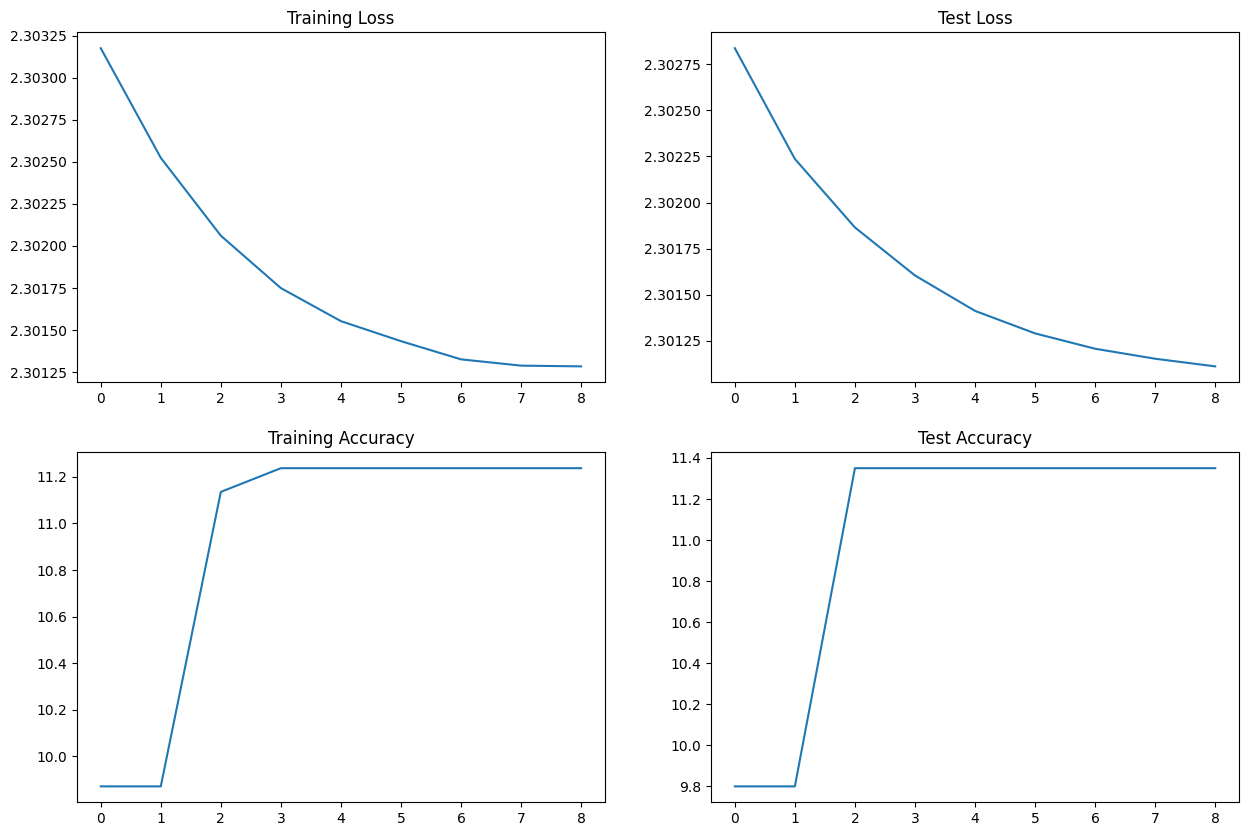

In [9]:
utils.printModelTrainTestAccuracy(train_acc, train_losses, test_acc, test_losses)